In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import random

In [28]:
dictionary = pd.read_pickle('Data/Stress.pkl')
df = pd.DataFrame(dictionary["signal"])
df[['ACCx','ACCy','ACCz']] = pd.DataFrame(df.ACC.tolist(), index = df.index)
df[['ECG']] = pd.DataFrame(df.ECG.tolist(), index = df.index)
df[['RESP']] = pd.DataFrame(df.RESP.tolist(), index = df.index)
df[['LABEL']] = pd.DataFrame(df.LABEL.tolist(), index = df.index)
df = df.drop(['ACC'], axis=1)
df = df.sort_index(axis = 1)
df

# df = df.astype({'ECG':'float'})

# dictionary["signal"]["ACC"][0][1]
# df = pd.DataFrame(rp, columns = ['ACCx', 'ACCy', 'ACCz', 'ECG', 'RESP', 'LABEL'])

,ACCx,ACCy,ACCz,ECG,LABEL,RESP
0,0.9554,-0.2220,-0.5580,0.021423,0.0,-1.148987
1,0.9258,-0.2216,-0.5538,0.020325,0.0,-1.124573
2,0.9082,-0.2196,-0.5392,0.016525,0.0,-1.152039
3,0.8974,-0.2102,-0.5122,0.016708,0.0,-1.158142
4,0.8882,-0.2036,-0.4824,0.011673,0.0,-1.161194
...,...,...,...,...,...,...
695,0.9134,-0.1400,0.1074,0.003479,7.0,2.299500
696,0.9092,-0.1394,0.0994,0.000778,7.0,2.305603
697,0.9084,-0.1414,0.0934,-0.001694,7.0,2.297974
698,0.9116,-0.1416,0.0958,-0.003799,7.0,2.354431


In [25]:
# df = pd.DataFrame(columns = ['ACCx', 'ACCy', 'ACCz', 'ECG', 'RESP', 'LABEL'])
# df
csv = df.to_csv('Stress.csv', index=False, encoding='utf-8')

In [4]:
# for i in range(len(dictionary["signal"]["ACC"])):
#     df = df.append({"ACCx": dictionary["signal"]["ACC"][i][0]}, ignore_index = True)
#     df = df.append({"ACCy": dictionary["signal"]["ACC"][i][1]}, ignore_index = True)
#     df = df.append({"ACCz": dictionary["signal"]["ACC"][i][2]}, ignore_index = True)
# df

In [5]:
item_counts = df["LABEL"].value_counts()
print(item_counts)
dict = item_counts.to_dict()
print(dict)

0.0    100
1.0    100
2.0    100
6.0    100
4.0    100
3.0    100
7.0    100
Name: LABEL, dtype: int64
{0.0: 100, 1.0: 100, 2.0: 100, 6.0: 100, 4.0: 100, 3.0: 100, 7.0: 100}


In [6]:
len(df)

700

In [7]:
df["BINARY"] = None
for i in range(len(df)):
    if df.loc[i, "LABEL"] == 2:
        df.loc[i, 'BINARY'] = 1
#         df["BINARY"][i] = 1
    else:
        df.loc[i, 'BINARY'] = 0 
#         df["BINARY"][i] = 0
df

,ACCx,ACCy,ACCz,ECG,LABEL,RESP,BINARY
0,0.9554,-0.2220,-0.5580,0.021423,0.0,-1.148987,0
1,0.9258,-0.2216,-0.5538,0.020325,0.0,-1.124573,0
2,0.9082,-0.2196,-0.5392,0.016525,0.0,-1.152039,0
3,0.8974,-0.2102,-0.5122,0.016708,0.0,-1.158142,0
4,0.8882,-0.2036,-0.4824,0.011673,0.0,-1.161194,0
...,...,...,...,...,...,...,...
695,0.9134,-0.1400,0.1074,0.003479,7.0,2.299500,0
696,0.9092,-0.1394,0.0994,0.000778,7.0,2.305603,0
697,0.9084,-0.1414,0.0934,-0.001694,7.0,2.297974,0
698,0.9116,-0.1416,0.0958,-0.003799,7.0,2.354431,0


In [8]:
uniq_values = df.LABEL.unique()
uniq_dict = {uniq_values[i]: [] for i in range(len(uniq_values))}
for i in uniq_dict:
    min = df.loc[df["LABEL"] == i, "RESP"].min()
    uniq_dict[i].append(min)
    max = df.loc[df["LABEL"] == i, "RESP"].max()
    uniq_dict[i].append(max)
    mean = df.loc[df["LABEL"] == i, "RESP"].mean()
    uniq_dict[i].append(mean)
    std = df.loc[df["LABEL"] == i, "RESP"].std()
    uniq_dict[i].append(std)
print(uniq_dict)  

{0.0: [-1.39617919921875, -1.12457275390625, -1.19342041015625, 0.04224704631603914], 1.0: [-0.23345947265625, 1.19171142578125, 0.7134246826171875, 0.2955339157237469], 2.0: [-1.63116455078125, -0.86517333984375, -1.0665130615234375, 0.12823314954549292], 6.0: [-0.4180908203125, 0.16632080078125, 0.084747314453125, 0.08561486266706556], 4.0: [-2.54364013671875, -2.00042724609375, -2.1305999755859375, 0.08807708808175198], 3.0: [-1.27105712890625, -0.09918212890625, -0.5306396484375, 0.24397469864245047], 7.0: [-0.00457763671875, 2.35595703125, 1.1905059814453125, 0.6931962371698447]}


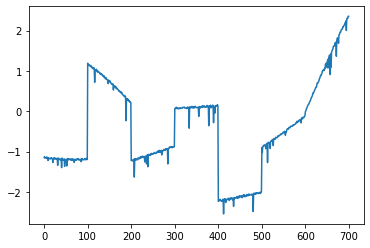

In [9]:
plot1 = df["RESP"].plot()
plt.show()

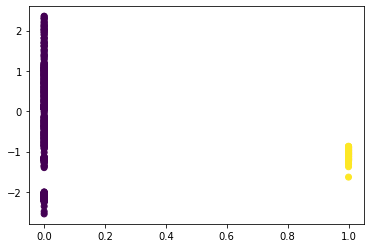

In [10]:
# col = []
# for i in range(len(df)):
#     if df["BINARY"][i] == 1:
#         col.append('g')
#     else:
#         col.append('r')
# for i in range(len(df)):
plot2 = plt.scatter(df["BINARY"], df["RESP"], c = df["BINARY"], marker = 'o')   
plt.show()

In [19]:
f = open("Numbers.txt", "w")
for i in range(50):
    x = str(random.randint(0,20))
    f.write(x + " ")
f.close()
f = open("Numbers.txt", "r")
# print(f.read())
r = f.read()
print(r)
x = r.split(" ")
x.pop()
lis = [int(i) for i in x]
dict_count = {}
for element in lis:
    if element in dict_count:
        dict_count[element] += 1
    else:
        dict_count[element] = 1
f = open("Count.txt", "w")
for key, value in dict_count.items():
    f.write(f"{key} - {value}\n")
f.close()
f = open("Count.txt", "r")
r1 = f.read()
print(r1)    

6 18 17 8 2 15 17 12 17 20 8 17 18 19 16 10 4 18 16 20 20 9 10 15 13 14 17 11 3 3 5 5 16 3 1 11 19 7 17 15 19 20 2 0 9 5 10 9 9 19 
{6: 1, 18: 3, 17: 6, 8: 2, 2: 2, 15: 3, 12: 1, 20: 4, 19: 4, 16: 3, 10: 3, 4: 1, 9: 4, 13: 1, 14: 1, 11: 2, 3: 3, 5: 3, 1: 1, 7: 1, 0: 1}
6 - 1
18 - 3
17 - 6
8 - 2
2 - 2
15 - 3
12 - 1
20 - 4
19 - 4
16 - 3
10 - 3
4 - 1
9 - 4
13 - 1
14 - 1
11 - 2
3 - 3
5 - 3
1 - 1
7 - 1
0 - 1

